See the High Gain version of this file for discussion of noisy column.

In [1]:
import sys
sys.path.append('..')
from cmost_exposure import Exposure

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from datetime import datetime

font = {'size' : 14, 'family' : 'sans-serif'}
matplotlib.rc('font', **font)

cmost_dir = '../data'

In [2]:
# Load noise map data
ex = Exposure('{}/022321/cmostjpl002_20210223154158.fits'.format(cmost_dir))

print(ex.get_info())

 Properties: 
		Readout mode: DEFAULT 
		Date: 2021-02-23T15:43:22.626283 
		Exposure time: 100.0 ms
		LED voltage: 0.0 V 
		Temperature: 140.0 K
		Camera ID: cmostjpl 
		Detector ID: EuropaBSI-1-7-3
		Gain mode: low
		Number of frames: 99
		
		


In [3]:
var_map = np.var(ex.cds_frames,axis=0)

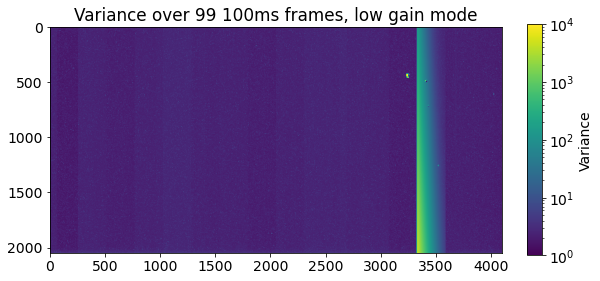

In [12]:
plt.figure(figsize=[9,5])
plt.title('Variance over 99 100ms frames, low gain mode')
plt.imshow(var_map,norm=colors.LogNorm(vmin=1, vmax=1e4))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='Variance')
plt.savefig('plots/20210225_noisemap_lowgain.pdf')
plt.show()

In [ ]:
var_map_alt = np.var(ex.cds_frames[5:],axis=0)

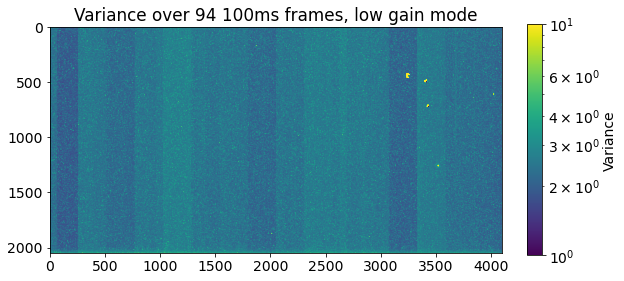

In [17]:
plt.figure(figsize=[9,5])
plt.title('Variance over 94 100ms frames, low gain mode')
plt.imshow(var_map_alt,norm=colors.LogNorm(vmin=1, vmax=10))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='Variance')
plt.savefig('plots/20210225_noisemap_lowgain_excluding1stframes.pdf')
plt.show()

In [55]:
# Convert ADU to electrons using gain = 10.1
low_gain = 10.1
var_map_e = low_gain**2 * var_map_alt

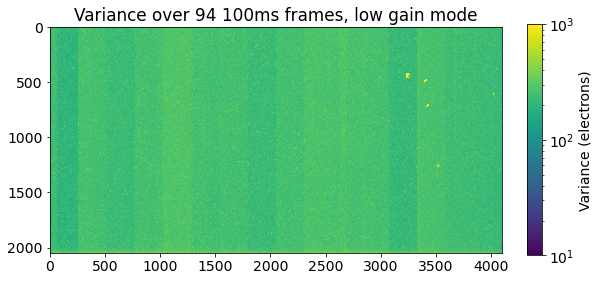

In [56]:
plt.figure(figsize=[9,5])
plt.title('Variance over 94 100ms frames, low gain mode')
plt.imshow(var_map_e,norm=colors.LogNorm(vmin=10, vmax=1000))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='Variance (electrons)')
plt.savefig('plots/20210225_noisemap_e_lowgain_excluding1stframes.pdf')
plt.show()

In [57]:
# Histogram of pixel values, excluding outliers from artifacts
hist, bin_edges = np.histogram(var_map_e, bins=140, range=(0,1400))

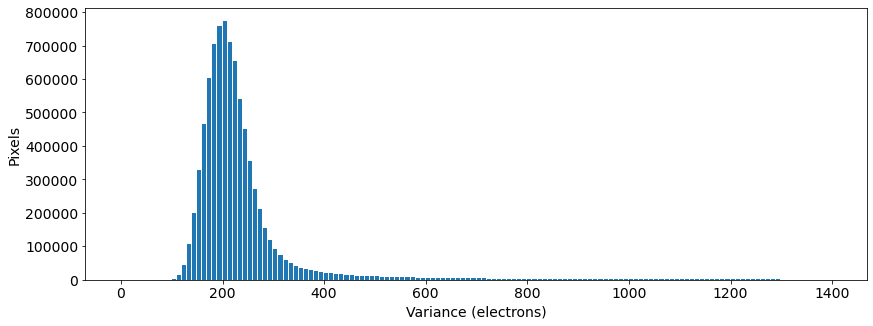

In [58]:
# Histogram of pixel values
# High-variance tail comes from rows > 2000
plt.figure(figsize=[14,5])
plt.bar(bin_edges[:-1],hist,width=0.8*(bin_edges[1]-bin_edges[0]),align="edge")
plt.xlabel('Variance (electrons)')
plt.ylabel('Pixels')
plt.savefig('plots/20210225_var_e_lowgain_histogram.pdf')
plt.show()
plt.close()